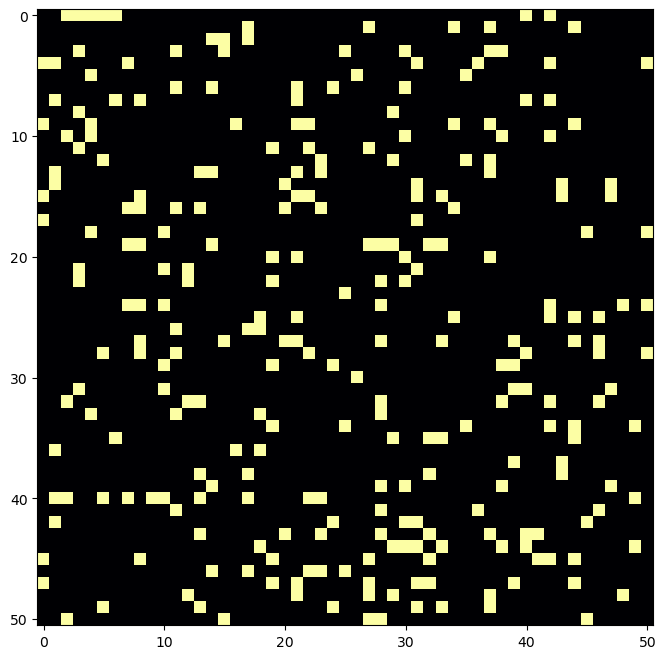

In [93]:
from numpy import zeros
from pylab import imshow, show, figure, close, rcParams, copy, plot
from random import random
import matplotlib.animation as animation
from IPython.display import HTML

N = 51                        # number of points on a side
grid = zeros([N,N],float)     # grid of points

density = 0.25


# This function will generate a random "seed," which is an initial configuration
# of the grid before evolution begins.
def generate_random_seed():
    num_points = int(density*N*N*random())
    for i in range(num_points):
        rand_x = int(N*random())
        rand_y = int(N*random())
        grid[rand_y][rand_x] = 1

# This function will generate a seed containing oscillators, Life-forms which
# are known for toggling/looping between/through various states
def generate_oscillator_seed():
    # seed for a "Beacon" oscillator
    grid[1][1] = 1
    grid[1][2] = 1
    grid[2][1] = 1
    grid[2][2] = 1
    grid[3][3] = 1
    grid[3][4] = 1
    grid[4][3] = 1
    grid[4][4] = 1
    
    # seed for a "Blinker" oscillator
    grid[10][10] = 1
    grid[10][11] = 1
    grid[10][12] = 1
    
    # seed for a "Toad" oscillator (I didn't come up with these names)
    grid[25][25] = 1
    grid[25][26] = 1
    grid[25][27] = 1
    grid[26][24] = 1
    grid[26][25] = 1
    grid[26][26] = 1
    
# This function will generate a seed containing still-lifes, Life-forms
# which are known for staying in a constant state throughout the execution
# of Life
def generate_still_life_seed():
    # seed for a "Block" still-life
    grid[1][1] = 1
    grid[1][2] = 1
    grid[2][1] = 1
    grid[2][2] = 1
    
    # seed for a "Tub" still-life
    grid[10][10] = 1
    grid[11][11] = 1
    grid[11][9] = 1
    grid[12][10] = 1
    
    # seed for a "Bee-hive" still-life
    grid[20][20] = 1
    grid[19][21] = 1
    grid[21][21] = 1
    grid[19][22] = 1
    grid[21][22] = 1
    grid[20][23] = 1
    
    
## SEEDS (uncomment/comment as needed to try out different seeds):
## -------------------------------------------------------------------------------
generate_random_seed()
#generate_oscillator_seed()
#generate_still_life_seed()
imshow(grid, cmap = "inferno")

### Conway's Rules in the Game of Life

1. Any live cell with fewer than two live neighbours dies, as if by underpopulation.
2. Any live cell with two or three live neighbours lives on to the next generation.
3. Any live cell with more than three live neighbours dies, as if by overpopulation.
4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [95]:
t = 0                         # initial time
tf = int(100)                 # final time
fig = figure()                # blank figure
imagelist = []                # empty list of images

# Using the rules outlined by John Conway, we decide if a cell indexed
# at i,j should be live or dead
def live_or_die(grid, i, j):
    i_vals = []
    j_vals = []
    
    # wrap around across top of canvas
    if i == 0:
        for k in range(3):
            i_vals.append(N - 1)
    else:
        for k in range(3):
            i_vals.append(i - 1)
            
    for k in range(2):
        i_vals.append(i)
        
    # wrap around across bottom of canvas
    if i == N - 1:
        for k in range(3):
            i_vals.append(0)
    else:
        for k in range(3):
            i_vals.append(i + 1)
            
    # handle j values
    for k in range(-1, 2, 1):
        if j + k < 0:
            j_vals.append(N - 1)
        elif j + k >= N:
            j_vals.append(0)
        else:
            j_vals.append(j + k)
    j_vals.append(j_vals[0])
    j_vals.append(j_vals[2])
    for k in range(3):
        j_vals.append(j_vals[k])
    
    # run through neighboring cells
    count = 0
    for k in range(8):
        if grid[i_vals[k]][j_vals[k]] == 1:
            count += 1
    
    # applying Conway's rules to see if the cell lives or dies (or stays dead or alive)
    if count < 2 or count > 3:
        return 0
    elif count == 2:
        if grid[i][j] == 1:
            return 1
        else:
            return 0
    else:
        return 1


def increment_generation(grid):
    new_grid = copy(grid)
    for i in range(N):
        for j in range(N):
            new_grid[i][j] = live_or_die(grid, i, j)
    return new_grid


def calculate_population_density(grid):
    total_space = N**2
    occupied_space = 0
    for i in range(N):
        for j in range(N):
            if grid[i][j] == 1:
                occupied_space += 1
    return occupied_space / N**2
    
    
## RUNNING CONWAY'S GAME OF LIFE
## ------------------------------

#generate_random_seed()
generate_oscillator_seed()
#generate_still_life_seed()

pop_density_vals = []
t_vals = []

while t < tf:
    pop_density_vals.append(calculate_population_density(grid))
    grid = increment_generation(grid)
    t_vals.append(t)
    t += 1
    rcParams['figure.figsize'] = [8, 8]
    image = imshow(grid, animated = True, cmap="inferno")  # generate density plot
    imagelist.append([image])                              # append image to list  
    
# make animation
ani = animation.ArtistAnimation(fig, imagelist, interval=200, blit=True, repeat_delay=10)
close()
HTML(ani.to_html5_video())

# Keep this commented unless you would like to save a video
# ----------------------------------------------------------
#ani.save("GameOfLife.mp4")

# Analysis

We can run a few tests to find out some characteristics and to gain more insight about what is happening with Conway's Game of Life.

For example, starting with a random seed, how chaotic is the evolution of Life? Is Conway's Game of Life skewed towards growth (reproduction), or reduction (death)?

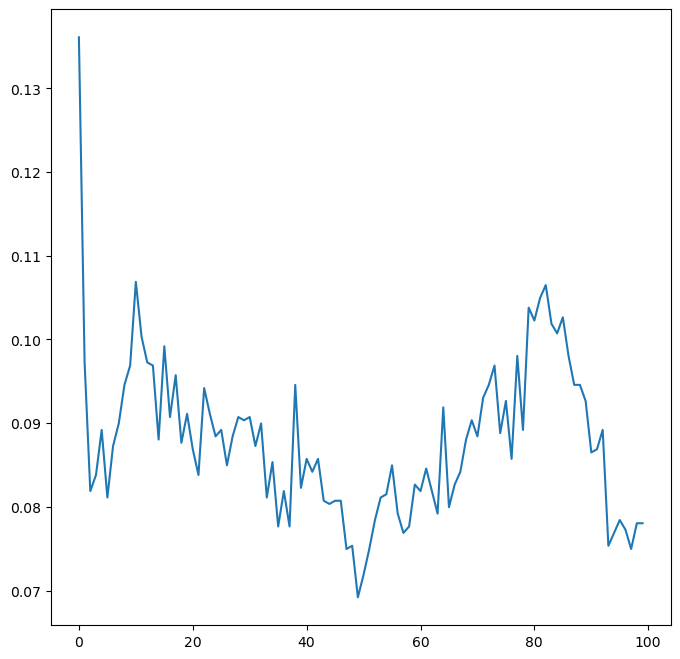

In [72]:
plot(t_vals, pop_density_vals)

We can see that the "population density" (the proportion of life on the "universe" with respect to how much space is available) varies quite frequently for a random seed. Also, different runs of different random seeds can cause drastically different results. Some seeds start out with a high population density and then quickly die out, while other seeds start sparse but very quickly grow, and yet others have a tendency to display more periodic behavior.

As expected, the oscillator seed displayed purely periodic population density changes, and always returned back to the original population density after every time step (period 2 oscillators only toggle between two states, so this is expected). Thus, populations that display more periodic behavior may have a higher chance of containing more naturally-occurring oscillators.

# Non-deterministic Life

Let's experiment with what happens when, even if the conditions are met, cells stay alive (or reproduce) with a CHANCE.

In [84]:
probability_threshold = 0.5

t = 0                         # initial time
tf = int(100)                 # final time
fig = figure()                # blank figure
imagelist = []                # empty list of images
grid = zeros([N, N], float)

def live_or_die_modified(grid, i, j):
    i_vals = []
    j_vals = []
    
    # wrap around across top of canvas
    if i == 0:
        for k in range(3):
            i_vals.append(N - 1)
    else:
        for k in range(3):
            i_vals.append(i - 1)
            
    for k in range(2):
        i_vals.append(i)
        
    # wrap around across bottom of canvas
    if i == N - 1:
        for k in range(3):
            i_vals.append(0)
    else:
        for k in range(3):
            i_vals.append(i + 1)
            
    # handle j values
    for k in range(-1, 2, 1):
        if j + k < 0:
            j_vals.append(N - 1)
        elif j + k >= N:
            j_vals.append(0)
        else:
            j_vals.append(j + k)
    j_vals.append(j_vals[0])
    j_vals.append(j_vals[2])
    for k in range(3):
        j_vals.append(j_vals[k])
    
    # run through neighboring cells
    count = 0
    for k in range(8):
        if grid[i_vals[k]][j_vals[k]] == 1:
            count += 1
    
    # MODIFIED RULES -------------------------------------------------------------------
    # applying Conway's rules to see if the cell lives or dies (or stays dead or alive), but the fate
    # of a cell now has some degree of randomness associated with it
    rand = random()
    if count < 2 or count > 3:
        if grid[i][j] == 1:
            #if rand >= probability_threshold:
                #return 0
            #else:
                #return 1
            return 0
        else:
            return 0
    elif count == 2:
        if grid[i][j] == 1:
            if rand >= probability_threshold:
                return 1
            else:
                return 0
        else:
            #if rand < probability_threshold:
                #return 0
            #else:
                #return 1
            return 0
    else:
        return 1

def increment_generation_modified(grid):
    new_grid = copy(grid)
    for i in range(N):
        for j in range(N):
            new_grid[i][j] = live_or_die_modified(grid, i, j)
    return new_grid

generate_random_seed()

pop_density_vals = []
t_vals = []

while t < tf:
    pop_density_vals.append(calculate_population_density(grid))
    grid = increment_generation_modified(grid)
    t_vals.append(t)
    t += 1
    rcParams['figure.figsize'] = [8, 8]
    image = imshow(grid, animated = True, cmap="inferno")  # generate density plot
    imagelist.append([image])                              # append image to list  
    
# make animation
ani = animation.ArtistAnimation(fig, imagelist, interval=200, blit=True, repeat_delay=10)
close()
HTML(ani.to_html5_video())

# A chaotic system?

In [88]:
t = 0                         # initial time
tf = int(100)                 # final time
fig = figure()                # blank figure
imagelist = []                # empty list of images

grid = zeros([N, N], float)

density = 0.15

generate_random_seed()
grid2 = copy(grid)

for i in range(N):
    for j in range(N):
        if grid[i][j] == 0:
            grid[i][j] = 1
            break

pop_density_vals = []
t_vals = []

while t < tf:
    pop_density_vals.append(calculate_population_density(grid))
    grid = increment_generation(grid)
    t_vals.append(t)
    t += 1
    rcParams['figure.figsize'] = [8, 8]
    image = imshow(grid, animated = True, cmap="inferno")  # generate density plot
    imagelist.append([image])                              # append image to list  
    
# make animation
ani = animation.ArtistAnimation(fig, imagelist, interval=200, blit=True, repeat_delay=10)
close()
HTML(ani.to_html5_video())

In [89]:
t = 0
fig = figure()                # blank figure
imagelist = []                # empty list of images

pop_density_vals2 = []
t_vals2 = []

while t < tf:
    pop_density_vals2.append(calculate_population_density(grid2))
    grid2 = increment_generation(grid2)
    t_vals2.append(t)
    t += 1
    rcParams['figure.figsize'] = [8, 8]
    image = imshow(grid2, animated = True, cmap="inferno")  # generate density plot
    imagelist.append([image])                              # append image to list  
    
# make animation
ani2 = animation.ArtistAnimation(fig, imagelist, interval=200, blit=True, repeat_delay=10)
close()
HTML(ani2.to_html5_video())

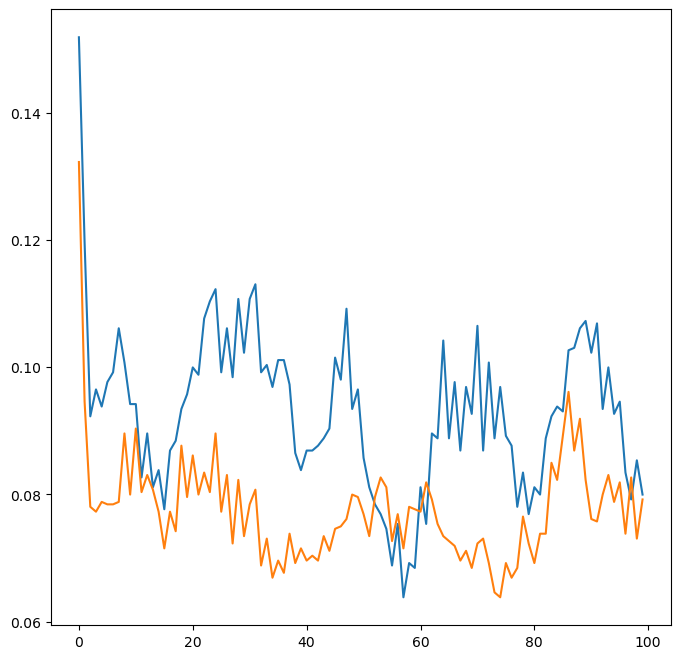

In [90]:
plot(t_vals, pop_density_vals)
plot(t_vals2, pop_density_vals2)

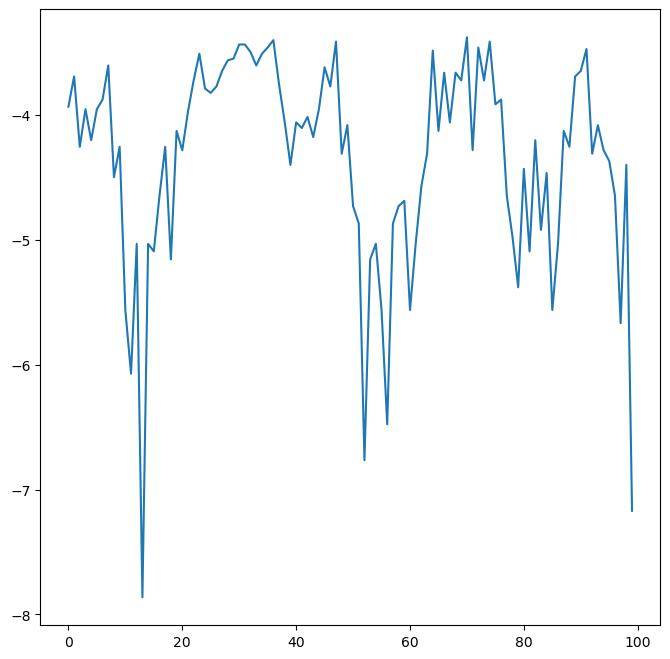

In [92]:
from numpy import math

pop_density_diff = []

for i in range(len(pop_density_vals)):
    diff = math.log(abs(pop_density_vals[i] - pop_density_vals2[i]))
    pop_density_diff.append(diff)
    
plot(t_vals, pop_density_diff)

Although the graph is not exactly linear (making it hard to analyze for a Lyapunov exponent), we can see that the differences between the populations changes drastically very quickly, even with only a slight discrepancy in the initial seed.